In [ ]:
import pandas as pd
import numpy as np
from numpy import linalg
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.datasets import load_boston, load_iris
from sklearn.preprocessing import StandardScaler ,MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
hx = wx + b 
hx = matmul( x , w) + b

# 1.선형 모델(Linear Models)

* 선형 모델은 과거 부터 지금 까지 널리 사용되고 연구 되고 있는 기계학습 방법
* 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행

* 회귀 분석을 위한 선형 모델은 다음과 같이 정의
\begin{equation}
\hat{y}(w,x) = b + w x
\end{equation}
\begin{equation}
\hat{y}(w,x) = b + w_1 x_1 + ... + w_p x_p
\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $b$: 편향
  + $w_1$~$w_p$: 가중치

# 2.선형 회귀(Linear Regression)

* **선형 회귀(Linear Regression)**또는 **최소제곱법(Ordinary Least Squares)**은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)**를 최소화 하는 학습 파라미터 $w$를 찾음
* 평균제곱오차는 아래와 같이 정의

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  + $y$: 정답
  + $\hat{y}$: 예측 값을 의미

* 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  + MAE(Mean Absoulte Error)
  + MAPE(Mean Absolute Percentage Error)
  + MSE(Mean Squared Error)
  + MPE(Mean Percentage Error)

In [ ]:
df = pd.read_csv('datas/data-01.csv',header=None)
df.columns = ['q1','q2','midterm','final']
df

,q1,q2,midterm,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [ ]:
x_data = df[['q1','q2','midterm']] # df.iloc[:,:-1]
x_data

,q1,q2,midterm
0,73,80,75
1,93,88,93
2,89,91,90
3,96,98,100
4,73,66,70
5,53,46,55
6,69,74,77
7,47,56,60
8,87,79,90
9,79,70,88


In [ ]:
y_data = df['final'] # df.iloc[:,-1]
y_data

0     152
1     185
2     180
3     196
4     142
5     101
6     149
7     115
8     175
9     164
10    141
11    141
12    184
13    152
14    148
15    192
16    147
17    183
18    177
19    159
20    177
21    175
22    175
23    149
24    192
Name: final, dtype: int64

In [ ]:
model_lr = LinearRegression()
model_lr.fit(x_data,y_data)

LinearRegression()

In [ ]:
display(model_lr.coef_)
display(model_lr.intercept_)

array([0.35593822, 0.54251876, 1.16744422])

-4.3361024012403675

In [ ]:
# q1 : 70 점, q2 : 75점, midterm : 75 점인 경우 예측값
# w1*x1 + w2*x2 + w3*x3 + b
70*0.35593822 + 75*0.54251876 + 75*1.16744422 + (-4.3361024012403675)

148.82679649875962

In [ ]:
model_lr.predict([[70,75,75]])

array([148.82679595])

In [ ]:
model_lr.predict( [[70,75,75],
                   [60,45,50]])

array([148.82679595,  99.80574563])

In [ ]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])

np.matmul(a,b)

array([[19, 22],
       [43, 50]])

In [ ]:
x_data.shape

(25, 3)

In [ ]:
p = model_lr.predict(x_data)
p

array([152.60720439, 185.08011472, 181.78158547, 199.74522647,
       139.1747207 , 103.69391793, 150.2632274 , 112.82069728,
       174.55948394, 164.49442094, 143.42337551, 142.23416416,
       186.54285759, 152.40794527, 151.24409108, 189.12496613,
       143.50219218, 181.89389361, 177.29838914, 158.34934019,
       176.57742415, 174.66365778, 167.68889392, 150.63279846,
       191.1954116 ])

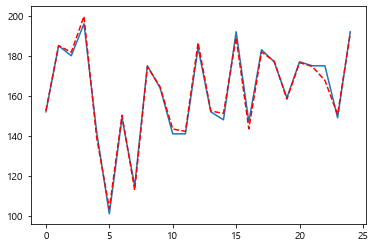

In [ ]:
plt.plot(y_data)
plt.plot(p,'r--')
plt.show()

## 연습문제 - 보스턴 주택 가격 데이터



* 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 정보 분석 등 많은 활용 가능한 측면들이 존재
* 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StatLib 라이브러리에서 가져온 것
* 헤리슨(Harrison, D.)과 루빈펠트(Rubinfeld, D. L.)의 논문 "Hedonic prices and the demand for clean air', J. Environ. Economics & Management"에서 보스턴 데이터가 사용
* 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 21개로 구성

| 속성 | 설명 |
|------|------|
| CRIM | 자치시(town)별 1인당 범죄율 |
| ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
| INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
| CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| NOX | 10,000,000당  일산화질소 농도 |
| RM | 주택 1가구당 평균 방의 수 |
| AGE | 1940년 이전에 건축된 소유주택 비율 |
| DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
| RAD | 방사형 고속도로 접근성 지수 |
| TAX | 10,000 달러당 재산 세율 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| B | 1000(Bk-0.63)^2, Bk: 자치시별 흑인 비율 |
| LSTAT | 모집단의 하위계층 비율(%) |
| MEDV | 소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러) |

In [ ]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
boston['data'].shape

(506, 13)

In [ ]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

---

In [ ]:
boston_df = pd.DataFrame(boston['data'],columns = boston['feature_names'])
boston_df['MEDV'] = boston['target']
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
# 0.02731	0.0	7.07	0.0	0.469	6.421	78.9	4.9671	2.0	242.0	17.8	396.90	9.14

# 주택가격을 예측하시오.

In [ ]:
x_data = boston_df.drop('MEDV',axis=1) # iloc[:,:-1]
y_data = boston_df['MEDV'] # iloc[:,-1]

boston_lr = LinearRegression()
boston_lr.fit(x_data,y_data)

LinearRegression()

In [ ]:
display(boston_lr.coef_)
display(boston_lr.intercept_)

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

36.45948838509015

In [ ]:
boston_lr.predict([[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.90, 9.14]])

array([[25.02556238]])

# 3.Scaler

>데이터 스케일링이란 데이터 전처리 과정 중 하나로 피처(feature)들마다 데이터값의 범위가 다 제각각이기 때문에 범위 차이가 클 경우 데이터를 갖고 모델을 학습할 때 0으로 수렴하거나 무한으로 발산할 수 있다. 따라서 데이터 스케일링을 통해 모든 피처들의 데이터 분포나 범위를 동일하게 조정해줄 수 있다.


|scaler|설명|
|---|---|
|StandardScaler|	기본 스케일. 평균과 표준편차 사용|
|MinMaxScaler|	최대/최소값이 각각 1, 0이 되도록 스케일링|
|MaxAbsScaler|	최대절대값과 0이 각각 1, 0이 되도록 스케일링|
|RobustScaler|	중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화|

### StandardScaler

> 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 한다.

> 특성의 최솟값과 최댓값 크기를 제한하지 않는다.

> StandardScaler 공식 : (x-mean)/std

    

### MinMaxScaler
> 모든 특성이 정확하게 0과 1 사이에 위치하도록 데이터를 변경한다.

> MinMaxScaler 공식 : (x−x_min)/(x_max−x_min)


    
### RobustScaler
> 특성들이 같은 스케일을 가지게 한다.(이러한 특징은 통계적 측면에서는 StandardScaler와 유사하다.)

> 평균과 분산 대신 median과 quantile을 사용한다. 따라서, **outlier의 영향을 받지 않는다.**

> RobustScaler 공식 : (x−q2)/(q3−q1)

In [ ]:
scaleX  = StandardScaler() # numpy(ndarray)  matrix로 줘야함
x_dataS = scaleX.fit_transform(x_data.values)
x_dataS

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_dataS,y_data.values,test_size=0.2, random_state=1) #  전부 다 ndarray 형식으로 줘야함

In [ ]:
modelSGD = SGDRegressor(verbose=1)
modelSGD.fit(x_train,y_train)

-- Epoch 1
Norm: 4.11, NNZs: 13, Bias: 15.823659, T: 404, Avg. loss: 100.491280
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4.72, NNZs: 13, Bias: 19.566186, T: 808, Avg. loss: 24.580193
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.97, NNZs: 13, Bias: 21.130733, T: 1212, Avg. loss: 14.929530
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.25, NNZs: 13, Bias: 21.837044, T: 1616, Avg. loss: 12.706519
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 5.47, NNZs: 13, Bias: 22.204646, T: 2020, Avg. loss: 11.998898
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 5.53, NNZs: 13, Bias: 22.361693, T: 2424, Avg. loss: 11.764758
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 5.69, NNZs: 13, Bias: 22.463133, T: 2828, Avg. loss: 11.648287
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.89, NNZs: 13, Bias: 22.504088, T: 3232, Avg. loss: 11.417547
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.90, NNZs: 13, Bias: 22.539576, T: 3636, Avg. loss: 11.538982
T

SGDRegressor(verbose=1)

In [ ]:
predict = modelSGD.predict(x_test)
predict

array([31.83073784, 28.2927857 , 17.88221113, 21.84713033, 18.65718568,
       20.21153951, 31.63532981, 18.21634565, 24.04889219, 27.18030134,
       26.75540713, 29.12295603, 21.56404558, 26.55814156, 23.25708553,
       20.27879558, 17.37573664, 38.21139484, 30.49077611,  9.18863023,
       20.76116633, 16.63546683, 25.24457056, 24.91254413, 31.16181533,
       10.65592465, 14.00786565, 17.54040121, 36.40059772, 14.47087712,
       22.05328   , 13.9606192 , 42.31807619, 18.04797351, 22.90569548,
       20.98812421, 17.6521177 , 27.45290505,  9.01778999, 19.63990064,
       25.41597943, 21.2203273 , 29.2316579 , 16.08216451, 19.09624382,
       14.77640171, 39.43380081, 17.99972653, 25.77425887, 20.63259852,
       25.10028701, 24.28049975, 25.14994092, 26.55259268,  6.02208864,
       23.75156109, 10.93725715, 26.82395339, 17.08089671, 35.87514404,
       19.54649503, 27.51444847, 16.41245942, 18.48342476, 11.16823668,
       32.1044863 , 36.72551481, 23.50852289, 24.27823194, 25.01

In [ ]:
y_test

array([28.2, 23.9, 16.6, 22. , 20.8, 23. , 27.9, 14.5, 21.5, 22.6, 23.7,
       31.2, 19.3, 19.4, 19.4, 27.9, 13.9, 50. , 24.1, 14.6, 16.2, 15.6,
       23.8, 25. , 23.5,  8.3, 13.5, 17.5, 43.1, 11.5, 24.1, 18.5, 50. ,
       12.6, 19.8, 24.5, 14.9, 36.2, 11.9, 19.1, 22.6, 20.7, 30.1, 13.3,
       14.6,  8.4, 50. , 12.7, 25. , 18.6, 29.8, 22.2, 28.7, 23.8,  8.1,
       22.2,  6.3, 22.1, 17.5, 48.3, 16.7, 26.6,  8.5, 14.5, 23.7, 37.2,
       41.7, 16.5, 21.7, 22.7, 23. , 10.5, 21.9, 21. , 20.4, 21.8, 50. ,
       22. , 23.3, 37.3, 18. , 19.2, 34.9, 13.4, 22.9, 22.5, 13. , 24.6,
       18.3, 18.1, 23.9, 50. , 13.6, 22.9, 10.9, 18.9, 22.4, 22.9, 44.8,
       21.7, 10.2, 15.4])

In [ ]:
modelSGD.score(x_train,y_train)

0.727769106161857

In [ ]:
modelSGD.score(x_test,y_test)

0.7629857292004694

In [ ]:
#train 점수
#test 점수 
- 테스트점수가 많이낮으면(과적합)
- 테스트점수가 많이 높으면( 과소적합)

In [ ]:
modelSGD.predict( [x_test[0]] )

array([31.72111346])

In [ ]:
x_test[0]

array([-0.41477789,  0.92862338, -1.30687771, -0.27259857, -0.71434722,
        0.80402837,  0.0613455 , -0.29108882, -0.29308074, -1.10611514,
       -0.02567665,  0.44105193, -0.71811916])

In [ ]:
y_test[0]

array([28.2])

In [ ]:
xd =scaleX.transform( [[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.90, 9.14]])

In [ ]:
modelSGD.predict( xd )

array([24.94856943])

## 연습문제

sl(target). feature(sw,pl,pw)

문제 : sw - 3.0, pl - 1.4, pw : 0.2 일 때 sl을 예측하시오

1 scale
2 train, test
3 train, test score
4 예측



In [ ]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
display(iris['target_names'])
display(iris['feature_names'])

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_df = pd.DataFrame(iris['data'],columns = iris['feature_names'])
iris_df['target'] = iris['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
x_data = iris_df.drop(['sepal length (cm)','target'],axis=1)
y_data = iris_df['sepal length (cm)']

In [ ]:
scaleX = StandardScaler()
x_dataS = scaleX.fit_transform(x_data.values)
x_dataS

array([[ 1.01900435e+00, -1.34022653e+00, -1.31544430e+00],
       [-1.31979479e-01, -1.34022653e+00, -1.31544430e+00],
       [ 3.28414053e-01, -1.39706395e+00, -1.31544430e+00],
       [ 9.82172869e-02, -1.28338910e+00, -1.31544430e+00],
       [ 1.24920112e+00, -1.34022653e+00, -1.31544430e+00],
       [ 1.93979142e+00, -1.16971425e+00, -1.05217993e+00],
       [ 7.88807586e-01, -1.34022653e+00, -1.18381211e+00],
       [ 7.88807586e-01, -1.28338910e+00, -1.31544430e+00],
       [-3.62176246e-01, -1.34022653e+00, -1.31544430e+00],
       [ 9.82172869e-02, -1.28338910e+00, -1.44707648e+00],
       [ 1.47939788e+00, -1.28338910e+00, -1.31544430e+00],
       [ 7.88807586e-01, -1.22655167e+00, -1.31544430e+00],
       [-1.31979479e-01, -1.34022653e+00, -1.44707648e+00],
       [-1.31979479e-01, -1.51073881e+00, -1.44707648e+00],
       [ 2.16998818e+00, -1.45390138e+00, -1.31544430e+00],
       [ 3.09077525e+00, -1.28338910e+00, -1.05217993e+00],
       [ 1.93979142e+00, -1.39706395e+00

In [ ]:
x_data = iris_df.drop(['sepal length (cm)','target'],axis=1)
y_data = iris_df['sepal length (cm)']

# StandardScaler
scaleX = StandardScaler()
x_dataS = scaleX.fit_transform(x_data.values)

# train test
x_train, x_test, y_train, y_test = train_test_split(x_dataS, y_data.values,test_size = 0.2 ,random_state=1)

# SGD
modelSGD = SGDRegressor()
modelSGD.fit(x_train,y_train)
modelSGD.predict(x_test)

# score
display(modelSGD.score(x_train,y_train))
display(modelSGD.score(x_test,y_test))


# sw - 3.0, pl - 1.4, pw : 0.2 일 때 sl을 예측
xd = scaleX.transform([[3.0,1.4,0.2]])
print('sl : ',modelSGD.predict(xd))

0.8020704656592146

0.8114535510753647

sl :  [4.75888653]


---
# 4.다중선형

In [ ]:
boston = load_boston()

In [ ]:
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['MEDV'] = boston['target']
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
x_data = boston_df.iloc[:,:-1]
y_data = boston_df.iloc[:,-1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,
                                                    test_size=0.2, random_state=1)

## 4-1.make_pipline

In [ ]:
# scaling을 안한 데이터를
# make_pipline을 이용하면 한 번에 간편하게 사용가능
model = make_pipeline( StandardScaler(),SGDRegressor() )
model.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [ ]:
model.score(x_train,y_train)

0.7282073076827034

In [ ]:
model.score(x_test,y_test)

0.7620251822354527

In [ ]:
model.predict([x_test.values[0]])

In [ ]:
model.predict(x_test.values[0].reshape(1,-1))

array([32.00190496])

### 4-1 연습문제

문제:sw:3.0, pl:1.4, pw: 0.2   sl 를 예측하시오
1. scale
2. train, test
3. train, test score
4. 예측

파이프라인을 이용하여 구하시요.

In [ ]:
iris=load_iris()
iris_df=pd.DataFrame(iris['data'],columns=iris['feature_names'])
iris_df.head()

iris_df.columns=['sl','sw','pl','pw']
x_data=iris_df[['sw','pl','pw']]
y_data=iris_df[['sl']]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                test_size=0.2,random_state=1)
model=make_pipeline(StandardScaler(),SGDRegressor() )
model.fit(x_train, y_train)
model.score(x_train, y_train)
model.score(x_test, y_test)
p=model.predict([[3.0,1.4,0.2]])
p

C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([4.74693495])

## 4-2.교차검증(데이터가 작은 경우)
- 데이터를 두개로 분리하고 모델을 생성 및 검증하였지만, 데이터를 분리하였기 때문에 훈련에 사용할 수 있는 양도 작아지고, 분리가 잘 안된 경우에는 잘못된 검증이 될 수 있음
- 이럴 경우에는 테스트셋을 여러개로 구성하여 교차 검증을 진행
- cross_val_score() 함수는 교차 검증을 수행하여 모델을 검증

In [ ]:
r2_scores = cross_val_score(model, x_train, y_train, cv = 5, scoring ='r2', verbose=1)
# scoring 결정계수

print(r2_scores)
print(r2_scores.mean())

[0.53921742 0.79843724 0.08714548 0.68577963 0.42237208]
0.5065903686993034


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [ ]:
1. 상관관계가 낮음
2. 다중공선성
check

3. scale 
4. 학습

## 4-3.다중 공선성
다중공선성 회귀 분석에서 사용된 모형의 일부 설명 변수가 다른 설명 변수와 상관 정도가 높아, 데이터 분석 시 부정적인 영향을 미치는 현상

X1은 일평균 음주량을 독립 변수 X2는 혈중 알코올 농도 둘의 상관관계가 높아 설명령이 약해진다

회귀 모델에서 다중공선성을 파악할 수 있는 대표적인 방법은 VIF 임. 
VIF (Variance inflation Factors 분산팽창요인)
- 안전 : VIF < 5
- 주의 : 5 < VIF < 10
- 위험 : 10 < VIF



In [ ]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


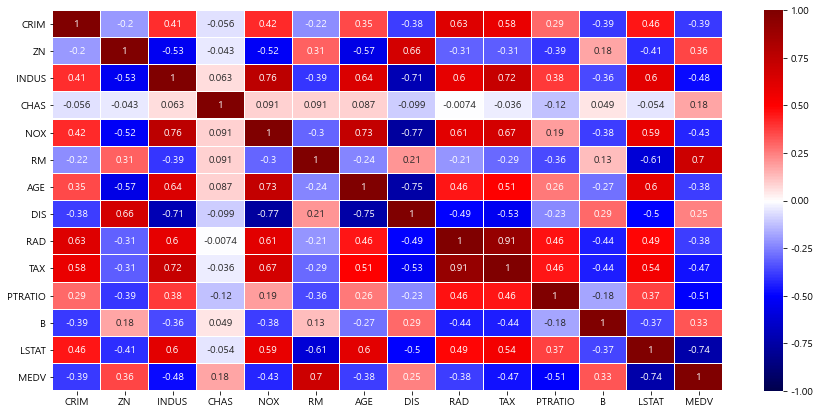

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(boston_df.corr(),annot=True, linewidth=0.1 , vmin=-1,vmax=1, cmap='seismic')
# vmin, vmax 상관관계 계수 범위
plt.show()

In [ ]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(boston_df.values,i) for i in range(boston_df.shape[1])] 
vif['features'] = boston_df.columns
vif 

# VIF 계수 상당히 높음 'RM','TAX','NOX','PTRATIO'

,VIF Factor,features
0,2.131404,CRIM
1,2.910004,ZN
2,14.485874,INDUS
3,1.176266,CHAS
4,74.004269,NOX
5,136.101743,RM
6,21.398863,AGE
7,15.430455,DIS
8,15.369980,RAD
9,61.939713,TAX


특성 데이터가 많은 경우 : 다중공선성(컬럼제거), 타겟(라벨)에 상관관계가 낮은 컬럼

### 연습문제 : 캘리포니아 주택 가격 데이터

| 속성 | 설명 |
|------|------|
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 자치시(town)별 비소매 상업지역 토지 비율 |
| AveBedrms | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| Population | 10,000,000당  일산화질소 농도 |
| AveOccup | 주택 1가구당 평균 방의 수 |
| Latitude | 1940년 이전에 건축된 소유주택 비율 |
| Longitude | 5개의 보스턴 고용 센터까지의 가중 거리 |

In [ ]:
from sklearn.datasets import fetch_california_housing

cal = fetch_california_housing()
caldf = pd.DataFrame(cal['data'],columns = cal['feature_names'])
caldf['MEDV'] = cal['target']
caldf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
caldf.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MEDV,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


### SGD

In [ ]:
# 데이터 추출
x_data = caldf.iloc[:,:-1]
y_data = caldf.iloc[:,[-1]]

# train / test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,random_state=1)

# 파이프라인
model_cal = make_pipeline(StandardScaler(), LinearRegression())
model_cal.fit(x_train, y_train)

#crossvalidation
r2scores = cross_val_score(model_cal, x_data, y_data, cv=5, scoring='r2', verbose=1)
print(r2scores)
print(r2scores.mean())

[0.54866323 0.46820691 0.55078434 0.53698703 0.66051406]
0.5530311140279566


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [ ]:
vif  = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_data.values,i)for i in range(x_data.shape[1])]
vif['features'] = x_data.columns
vif

,VIF Factor,features
0,11.511140,MedInc
1,7.195917,HouseAge
2,45.993601,AveRooms
3,43.590314,AveBedrms
4,2.935745,Population
5,1.095243,AveOccup
6,559.874071,Latitude
7,633.711654,Longitude


In [ ]:
x_data = x_data.drop(['Latitude','Longitude'],axis=1)
y_data = caldf['MEDV']

In [ ]:
# 100 이상 2개만 특성만 제외해봄
x_data_remove = x_data.drop(columns=['Latitude', 'Longitude'])
r2scores = cross_val_score(model_cal, x_data_remove, y_data, cv=5, scoring='r2')
print(r2scores)
print(r2scores.mean())

[0.51316586 0.44125064 0.50924807 0.45469149 0.53474157]
0.49061952537484466


# 5.선형회귀(기타)

In [ ]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=9f16406f2174e8bc02721a178ff66a7d407c8a1f355d17d0ccbabe80f78c085b
  Stored in directory: c:\users\medici\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris

from sklearn.linear_model import Ridge,Lasso,ElasticNet, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')


## L1_L2_norm
p = 1 >> L1 Norm 

p = 2 >> L2 Norm

https://en.wikipedia.org/wiki/Norm_(mathematics)

In [ ]:
np.random.seed(20)
data = np.random.randint( -5,6, size=(2,2)) #-5<= n <6
data
df = pd.DataFrame( data)
df

,0,1
0,-2,5
1,5,4


L1 norm

In [ ]:
linalg.norm(df, ord=1, axis=1)

array([7., 9.])

In [ ]:
np.random.seed(20)
data = np.random.randint( 1,10, size=(3,2)) #-5<= n <6
data
df = pd.DataFrame( data)
df

,0,1
0,4,5
1,7,8
2,3,1


L2 norm

In [ ]:
linalg.norm(df, ord=2, axis=1)

array([ 6.40312424, 10.63014581,  3.16227766])

https://bskyvision.com/825

## 릿지 회귀(Ridge Regression) L2규제

* 릿지 회귀는 선형 회귀를 개선한 선형 모델
* 릿지 회귀는 선형 회귀와 비슷하지만, 가중치의 값을 최대한 작게 만든다는 것이 다름
* 이러한 방법은 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
* 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
* 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
* 릿지 회귀는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음
* α=0이면 릿지회귀는 선형회귀와 같아지고, α가 커질수록 모든 가중치가 0에 가까워져 결국 데이터의 평균을 지나는 수평선이 된다.

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 사용자가 지정하는 매개변수
  * $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐
  * p:특성의갯수

In [ ]:
boston = load_boston()

In [ ]:
boston_df = pd.DataFrame(  boston['data'],columns=boston['feature_names'])
boston_df['MEDV'] =boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
x_data = boston_df.iloc[:,:-1]
y_data = boston_df.iloc[:,-1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                test_size=0.2,random_state=1)

In [ ]:
model_ridge = make_pipeline(StandardScaler(), Ridge() )
model_ridge.fit( x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [ ]:
print( model_ridge.score( x_train, y_train) )
print( model_ridge.score( x_test, y_test) )

0.7293360329044442
0.7634038058032349


In [ ]:
model_ridge5 = make_pipeline(StandardScaler(), Ridge(alpha=5.0) )
model_ridge5.fit( x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=5.0))])

In [ ]:
print( model_ridge5.score( x_train, y_train) )
print( model_ridge5.score( x_test, y_test) )

0.7289067264142004
0.7629020804027657


## 라쏘 회귀(Lasso Regression) L1규제
​
​
* 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
* 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용
​
* 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음
​
\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}
​
* 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능
* p: 독립변수의 갯수

In [ ]:
model_lasso = make_pipeline(StandardScaler(), Lasso() )
model_lasso.fit( x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [ ]:
print( model_lasso.score( x_train, y_train) )
print( model_lasso.score( x_test, y_test) )

0.6510370822546789
0.6546512972478653


In [ ]:
model_lasso5 = make_pipeline(StandardScaler(), Lasso(alpha=5.0) )
model_lasso5.fit( x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=5.0))])

In [ ]:
print( model_lasso5.score( x_train, y_train) )
print( model_lasso5.score( x_test, y_test) )

0.2411098676402389
0.20844368630060406


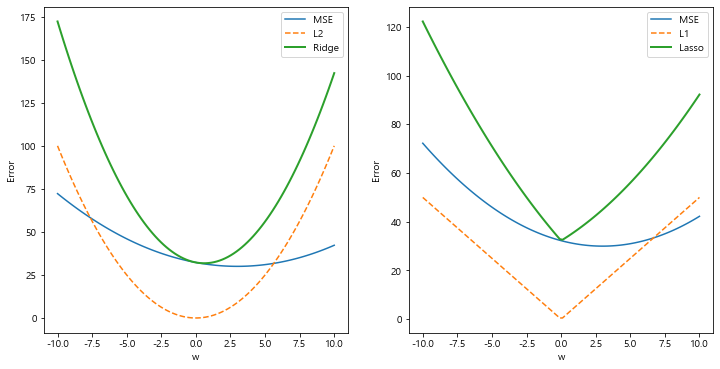

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[12,6])

rng = np.linspace(-10,10,100)
mse = ( 0.5*(rng-3) )**2 + 30
l2 = rng**2
l1 = 5*np.abs(rng)
ridge = mse + l2
# ridge = mse -30

lasso = mse + l1

plt.subplot(1,2,1)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l2,'--',label='L2')
plt.plot(rng,ridge, lw=2, label='Ridge')
plt.xlabel('w'); plt.ylabel('Error')
plt.legend()

plt.subplot(1,2,2)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l1,'--',label='L1')
plt.plot(rng,lasso, lw=2, label='Lasso')
plt.xlabel('w'); plt.ylabel('Error')
plt.legend()


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
modelLasso = Pipeline( [ ('scl', StandardScaler() ), ('clf', Lasso()) ] )
# param_value = {'clf_alpha':[0.001,0.01, 1,2,3,4], 'scl_with_mean':[True,False] }
param_value = {'clf__alpha':[ 0.001,0.01,1,2,3,4] }
gridSearch = GridSearchCV( modelLasso,  param_grid=param_value ,cv=10 ,verbose=1 ,scoring='r2')
gridSearch.fit( x_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('clf', Lasso())]),
             param_grid={'clf__alpha': [0.001, 0.01, 1, 2, 3, 4]}, scoring='r2',
             verbose=1)

In [ ]:
gridSearch.best_score_

0.6779423483447163

In [ ]:
gridSearch.best_params_

{'clf__alpha': 0.01}

In [ ]:
gridSearch.cv_results_

{'mean_fit_time': array([0.00526774, 0.00394008, 0.00363057, 0.0036792 , 0.00354338,
        0.0030545 ]),
 'std_fit_time': array([0.00186151, 0.00116579, 0.0008239 , 0.0006134 , 0.0006349 ,
        0.00054565]),
 'mean_score_time': array([0.00175846, 0.00169878, 0.0015105 , 0.00128939, 0.0012949 ,
        0.00136061]),
 'std_score_time': array([0.0003588 , 0.00079552, 0.00039012, 0.00034343, 0.00031652,
        0.00051502]),
 'param_clf__alpha': masked_array(data=[0.001, 0.01, 1, 2, 3, 4],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__alpha': 0.001},
  {'clf__alpha': 0.01},
  {'clf__alpha': 1},
  {'clf__alpha': 2},
  {'clf__alpha': 3},
  {'clf__alpha': 4}],
 'split0_test_score': array([0.86741933, 0.8674495 , 0.74379226, 0.63721411, 0.49084771,
        0.3494708 ]),
 'split1_test_score': array([0.53857014, 0.53985541, 0.56511277, 0.53008636, 0.44409762,
        0.35941902]),
 'split2_test_score': a

In [ ]:
gridSearch.best_estimator_.predict( x_test )

array([32.47490159, 28.12987635, 17.99758874, 21.59467646, 18.78113215,
       19.9054232 , 32.24548395, 18.10731193, 24.28355458, 27.07276872,
       26.91811443, 28.84699137, 21.25821228, 26.78436789, 23.35425277,
       20.55737907, 17.31818837, 38.20107276, 30.49008317,  8.86690023,
       20.8036567 , 16.38064481, 25.21265174, 24.89868344, 31.33266735,
       10.7419558 , 13.88204311, 16.89019083, 36.48926363, 14.60805028,
       21.33716851, 13.96614295, 42.93446218, 17.9737495 , 22.0898439 ,
       20.714934  , 17.59898767, 27.30050043,  9.37526708, 19.74832155,
       24.6039903 , 21.25145519, 29.49189492, 16.24904175, 19.22623771,
       14.6501572 , 39.1377036 , 18.06654423, 25.84809473, 20.44186795,
       25.11177946, 24.39847463, 25.12406209, 26.58879586,  4.82750881,
       24.00969384, 10.90593883, 26.89589097, 16.92873279, 35.8638718 ,
       19.53784819, 27.53852396, 16.52302842, 18.71106844, 11.21959849,
       32.33423855, 36.70207163, 22.33109429, 24.50027637, 25.06

## 신축망 (Elastic-Net)

* 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
* 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
* 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 줌

* 신축망은 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 규제의 강도를 조절하는 매개변수
  + $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

In [ ]:
model_elastic = make_pipeline(StandardScaler(), ElasticNet() )
model_elastic.fit( x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet())])

In [ ]:
print( model_elastic.score( x_train, y_train) )
print( model_elastic.score( x_test, y_test) )

0.635207359597604
0.6285547370483677


In [ ]:
# alpha=1.0, l1_ratio=0.5
grid search 를 이용하여 최적의 alpha 와 ㅣ1 ratio

In [ ]:
modelElastic = Pipeline([('scl', StandardScaler()), ('clf',ElasticNet()),])
param_value = {'clf__alpha': [0.001, 0.01, 1, 2, 3, 4],
              'clf__l1_ratio' : [0.1, 0.5, 1]}
gridSearch = GridSearchCV(modelElastic, param_grid = param_value, cv = 10, verbose = 1, scoring = 'r2')
gridSearch.fit(x_train, y_train)
gridSearch.best_params_

Fitting 10 folds for each of 30 candidates, totalling 300 fits


{'clf__alpha': 0.01, 'clf__l1_ratio': 1}

In [ ]:
gridSearch.best_score_

0.6779423483447163

## 다항 회귀 (Polynomial Regression)

* 입력 데이터를 비선형 변환 후 사용하는 방법
* 모델 자체는 선형 모델

\begin{equation}
\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_1^2 + w_5 x_2^2
\end{equation}

$ * 차수(차수 2는 2번곱함 x^2, 차수3은 3번곱합 x^3)가  $<br>
높아질수록 더 복잡한 데이터 학습 가능

![polynomial regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_polynomial_interpolation_0011.png)


In [ ]:
model = make_pipeline( PolynomialFeatures(degree=2 ), StandardScaler(), LinearRegression()  )
model.fit( x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
print( model.score( x_train, y_train) )
print( model.score( x_test, y_test) )

0.9264046957163292
0.911624405563433
